In [1]:
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.spatial import distance
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

**Wczytanie bazy**

In [2]:
iris = datasets.load_iris()
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,test_size=0.3)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

**Zadanie 1**


In [3]:
k = 3
predictions = []
for x_test in X_test:
    distances = [distance.euclidean(x_test, x_train) for x_train in X_train]
    knn_id = np.argsort(distances)[:k]
    knn_labels = [Y_train[i] for i in knn_id]
    prediction = max(set(knn_labels), key=knn_labels.count)
    predictions.append(prediction)

accuracy = accuracy_score(Y_test, predictions) * 100
print(accuracy)

97.77777777777777


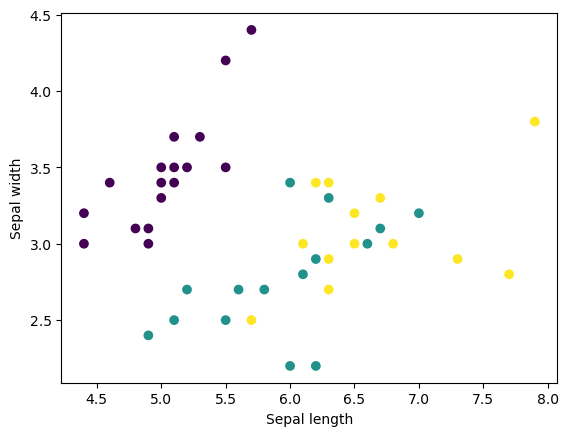

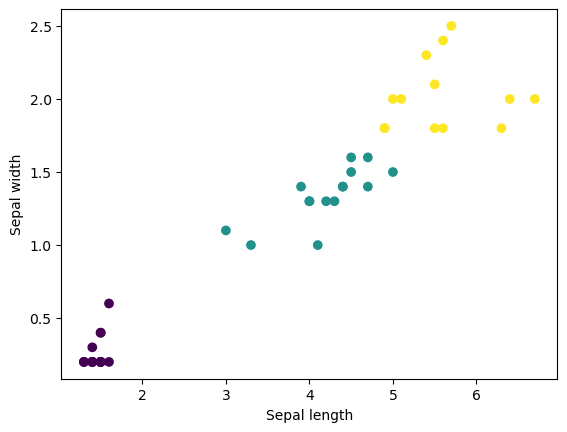

In [4]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
plt.scatter(X_test[:, 2], X_test[:, 3], c=predictions)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

**Zadanie 2**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_test)
output = accuracy_score(Y_test, y_pred)*100
print(output)

97.77777777777777


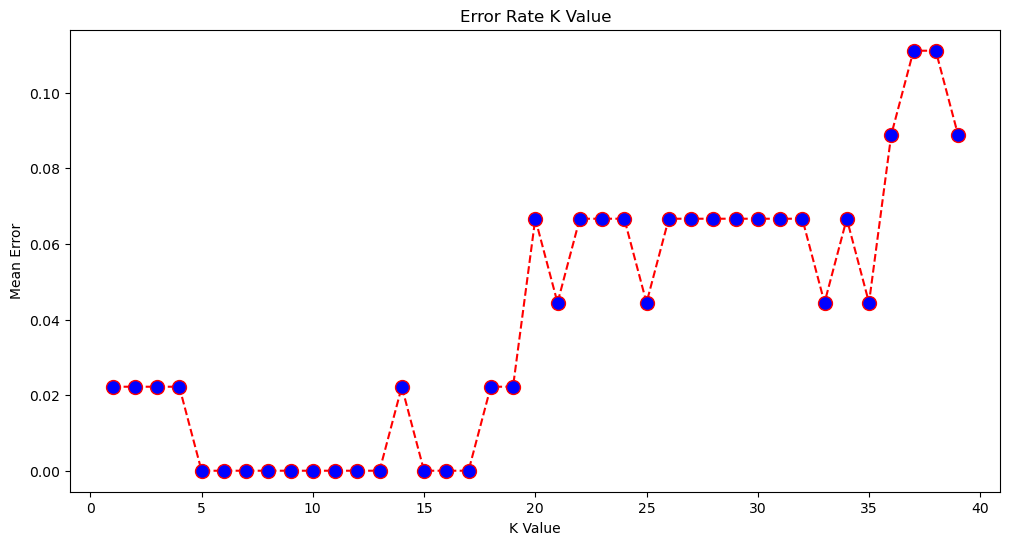

In [6]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

**Zadanie 3**

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [8]:
clf.predict(iris.data[:1, :])

array([0])

In [9]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")

True

In [10]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
 
 
 
# wczytywanie danych
dane = loadmat('mnist.mat')

X = dane["trainX"]
y = dane["trainY"]
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
y = y.T
# Ex 2. Please display the number of digits and the number of pixels per image
print(X.shape)
print(y.shape)


(60000, 784)
(60000, 1)


In [11]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

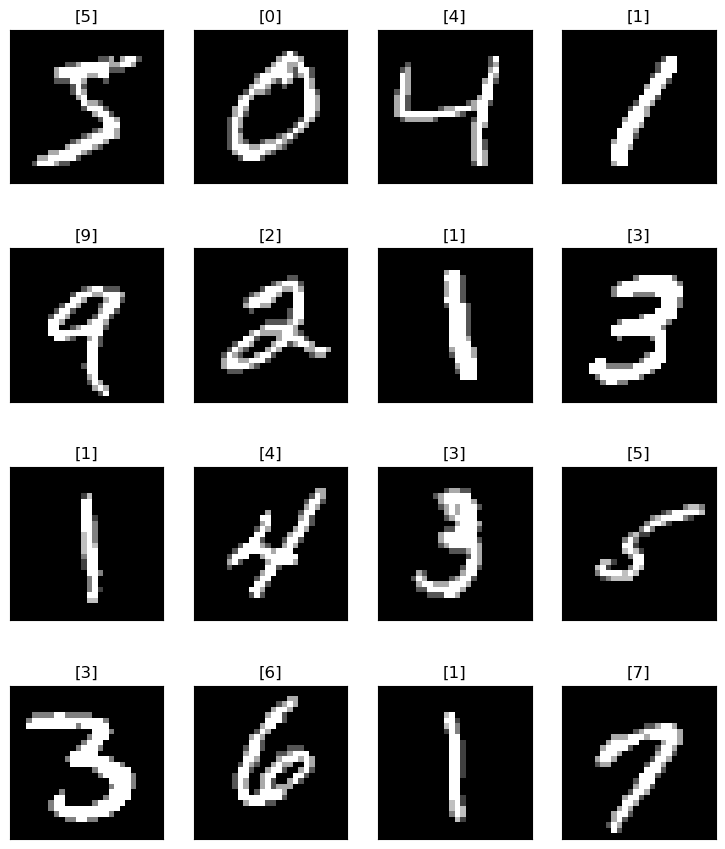

In [12]:
plot_mnist(X,y,h,w,n_row=4, n_col=4)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
output = accuracy_score(y_test, y_pred)*100
print(output)


82.41111111111111


In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8250804671299417

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1807
           1       0.94      0.94      0.94      1999
           2       0.78      0.80      0.79      1777
           3       0.79      0.76      0.78      1791
           4       0.84      0.82      0.83      1775
           5       0.68      0.78      0.73      1687
           6       0.88      0.83      0.86      1732
           7       0.89      0.86      0.87      1896
           8       0.77      0.78      0.77      1719
           9       0.76      0.77      0.76      1817

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.83      0.82      0.83     18000



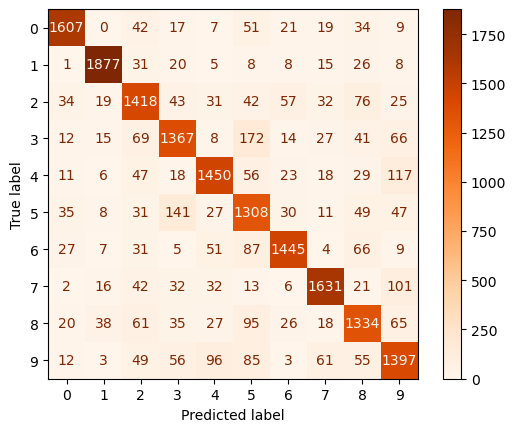

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.show()
